<a href="https://colab.research.google.com/github/tmorenounal/Regresi-n-Boston-Housing/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# se cargan los datos en formato csv
data = pd.read_excel('Xavantes/BancoXavantes837.xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head(5)

,IID,Sexo,Edad,Leptina,Grasa,IMC,BAI,Cintura,Cadera,CVLDL,Triglic,CTOTAL,CLDL,CHDL,FTO_Aditivo
0,1,1,60,2.933000e+14,39.7,43.7,3.878311e+09,131.0,116.0,66.0,329999999848026,157999999995739,580000000263077,34.0,1
1,2,1,43,5.970000e+14,9.7,22.5,2.170978e+09,98.5,97.5,44.0,222000000028354,177000000075432,899999999702762,43.0,0
2,3,2,49,7.260000e+14,15.6,24.2,3.084118e+09,92.0,97.0,21.0,106999999950576,124000000048975,580000000263077,45.0,0
3,4,2,75,2.900000e-01,14.1,21.3,2.783843e+09,96.5,102.5,77.0,384999999889203,225999999938463,989999999866756,50.0,0
4,5,2,72,1.279000e+14,20.5,25.1,2.855847e+09,98.0,96.0,54.0,269000000107105,157999999995739,690000000277891,35.0,0


In [ ]:
data.shape

(837, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IID          837 non-null    int64  
 1   Sexo         837 non-null    int64  
 2   Edad         837 non-null    int64  
 3   Leptina      837 non-null    float64
 4   Grasa        837 non-null    float64
 5   IMC          837 non-null    float64
 6   BAI          837 non-null    float64
 7   Cintura      837 non-null    float64
 8   Cadera       837 non-null    float64
 9   CVLDL        837 non-null    float64
 10  Triglic      837 non-null    int64  
 11  CTOTAL       837 non-null    int64  
 12  CLDL         837 non-null    int64  
 13  CHDL         837 non-null    float64
 14  FTO_Aditivo  837 non-null    int64  
dtypes: float64(8), int64(7)
memory usage: 98.2 KB


In [ ]:
data.describe()

,IID,Sexo,Edad,Leptina,Grasa,IMC,BAI,Cintura,Cadera,CVLDL,Triglic,CTOTAL,CLDL,CHDL,FTO_Aditivo
count,837.000000,837.000000,837.000000,8.370000e+02,837.000000,837.000000,8.370000e+02,837.000000,837.000000,837.000000,8.370000e+02,8.370000e+02,8.370000e+02,837.000000,837.000000
mean,941.725209,1.514934,41.593787,2.799039e+14,21.940860,30.159857,2.835170e+09,96.958184,101.239546,32.332616,3.027435e+14,2.016032e+14,5.482815e+14,39.094026,0.113501
std,588.647193,0.500076,19.501315,2.502691e+14,8.503765,5.186681,1.069842e+09,11.088987,9.965185,15.947739,2.609266e+14,2.101378e+14,2.759933e+14,8.104386,0.317393
min,1.000000,1.000000,18.000000,2.000000e-01,4.600000,15.700000,5.540000e+01,63.000000,71.500000,6.000000,1.357000e+12,1.050000e+13,1.134000e+12,14.000000,0.000000
25%,252.000000,1.000000,27.000000,1.079000e+14,15.800000,26.400000,2.573985e+09,89.000000,94.500000,20.000000,1.310000e+14,1.240000e+14,3.700000e+14,34.000000,0.000000
50%,1180.000000,2.000000,36.000000,1.931800e+14,21.300000,29.900000,3.015874e+09,97.000000,101.000000,29.000000,1.930000e+14,1.440000e+14,6.000000e+14,39.000000,0.000000
75%,1431.000000,2.000000,48.000000,4.339000e+14,26.900000,33.500000,3.461342e+09,104.500000,108.000000,41.200000,3.430000e+14,1.690000e+14,7.700000e+14,44.000000,0.000000
max,1706.000000,2.000000,99.000000,9.930000e+14,58.000000,51.200000,5.282599e+09,146.000000,144.000000,80.000000,9.900000e+14,9.900000e+14,9.900000e+14,74.000000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalización de variables con escalas muy grandes
cols_to_scale = ["Leptina", "Triglic", "CTOTAL", "CLDL", "BAI"]
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

# Confirmar que las escalas han sido ajustadas
data.describe()

,IID,Sexo,Edad,Leptina,Grasa,IMC,BAI,Cintura,Cadera,CVLDL,Triglic,CTOTAL,CLDL,CHDL,FTO_Aditivo
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,941.725209,1.514934,41.593787,0.281877,21.940860,30.159857,0.536700,96.958184,101.239546,32.332616,0.304849,0.195103,0.553308,39.094026,0.113501
std,588.647193,0.500076,19.501315,0.252033,8.503765,5.186681,0.202522,11.088987,9.965185,15.947739,0.263924,0.214536,0.279101,8.104386,0.317393
min,1.000000,1.000000,18.000000,0.000000,4.600000,15.700000,0.000000,63.000000,71.500000,6.000000,0.000000,0.000000,0.000000,14.000000,0.000000
25%,252.000000,1.000000,27.000000,0.108661,15.800000,26.400000,0.487257,89.000000,94.500000,20.000000,0.131132,0.115875,0.373019,34.000000,0.000000
50%,1180.000000,2.000000,36.000000,0.194542,21.300000,29.900000,0.570907,97.000000,101.000000,29.000000,0.193844,0.136294,0.605609,39.000000,0.000000
75%,1431.000000,2.000000,48.000000,0.436959,26.900000,33.500000,0.655235,104.500000,108.000000,41.200000,0.345568,0.161817,0.777523,44.000000,0.000000
max,1706.000000,2.000000,99.000000,1.000000,58.000000,51.200000,1.000000,146.000000,144.000000,80.000000,1.000000,1.000000,1.000000,74.000000,1.000000


**Analisis Estadistico Básico**

Sexo
2    431
1    406
Name: count, dtype: int64


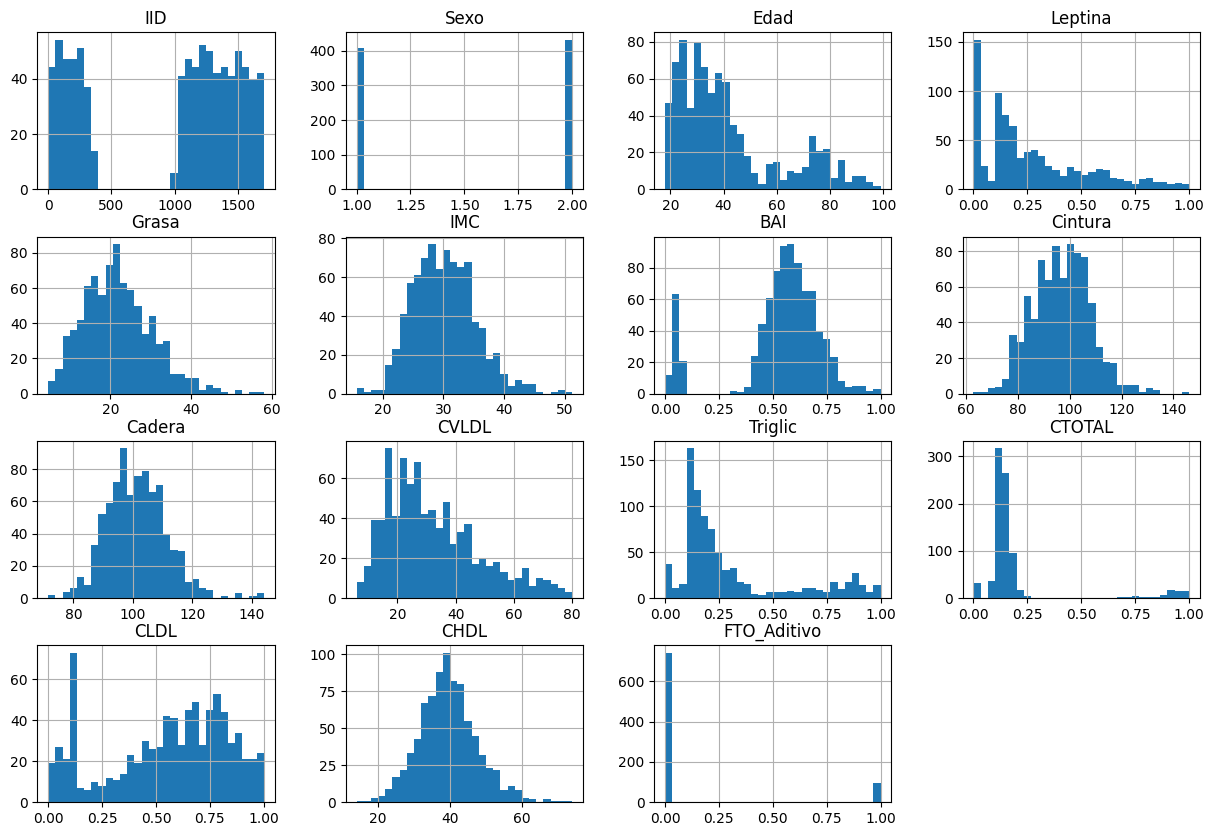

In [ ]:
import matplotlib.pyplot as plt

print(data['Sexo'].value_counts())

# Histogramas de las variables numéricas
data.hist(bins=30, figsize=(15, 10))
plt.show()

In [ ]:
data_numerico = data.iloc[:,:-1]
cov_matrix = data_numerico.cov()
cov_matrix

,IID,Sexo,Edad,Leptina,Grasa,IMC,BAI,Cintura,Cadera,CVLDL,Triglic,CTOTAL,CLDL,CHDL
IID,346505.517701,-0.452829,-730.713432,-2.024821,-262.407658,95.628310,-7.488904,-1409.153849,-1104.517709,-583.890787,2.159585,5.070627,3.575688,206.523357
Sexo,-0.452829,0.250076,-0.248711,0.017215,1.393289,0.295696,0.033000,0.888664,0.839301,-0.082725,0.001802,-0.002644,0.006329,0.938965
Edad,-730.713432,-0.248711,380.301301,-0.031444,-7.200727,-24.283073,-0.297869,-0.878729,-31.706644,47.164700,-0.143329,-0.361339,0.205924,21.872690
Leptina,-2.024821,0.017215,-0.031444,0.063521,0.394520,0.202898,0.006972,0.518882,0.391496,0.548143,-0.004418,0.000644,-0.001400,-0.004388
Grasa,-262.407658,1.393289,-7.200727,0.394520,72.314022,38.408341,0.614976,81.918469,72.264758,31.713044,-0.355993,-0.087604,0.113042,-2.430581
IMC,95.628310,0.295696,-24.283073,0.202898,38.408341,26.901664,0.346199,48.949372,45.388132,21.007651,-0.258525,-0.037493,0.015919,-4.133793
BAI,-7.488904,0.033000,-0.297869,0.006972,0.614976,0.346199,0.041015,0.752938,0.727933,0.193041,-0.001109,-0.000213,0.001733,0.083381
Cintura,-1409.153849,0.888664,-0.878729,0.518882,81.918469,48.949372,0.752938,122.965642,98.803701,47.859978,-0.512247,-0.101136,0.072117,-6.461434
Cadera,-1104.517709,0.839301,-31.706644,0.391496,72.264758,45.388132,0.727933,98.803701,99.304906,36.745467,-0.443199,-0.000935,0.081731,-6.763292
CVLDL,-583.890787,-0.082725,47.164700,0.548143,31.713044,21.007651,0.193041,47.859978,36.745467,254.330382,-1.425385,-0.595387,-0.170557,-11.386384


In [ ]:
corr_matrix = data_numerico.corr()
corr_matrix

,IID,Sexo,Edad,Leptina,Grasa,IMC,BAI,Cintura,Cadera,CVLDL,Triglic,CTOTAL,CLDL,CHDL
IID,1.000000,-0.001538,-0.063654,-0.013648,-0.052422,0.031321,-0.062819,-0.215880,-0.188292,-0.062198,0.013901,0.040152,0.021764,0.043291
Sexo,-0.001538,1.000000,-0.025503,0.136589,0.327638,0.114004,0.325840,0.160254,0.168421,-0.010373,0.013650,-0.024644,0.045345,0.231683
Edad,-0.063654,-0.025503,1.000000,-0.006398,-0.043421,-0.240077,-0.075420,-0.004063,-0.163155,0.151654,-0.027848,-0.086368,0.037834,0.138394
Leptina,-0.013648,0.136589,-0.006398,1.000000,0.184077,0.155213,0.136596,0.185660,0.155878,0.136376,-0.066414,0.011903,-0.019904,-0.002148
Grasa,-0.052422,0.327638,-0.043421,0.184077,1.000000,0.870813,0.357088,0.868718,0.852766,0.233845,-0.158618,-0.048019,0.047629,-0.035268
IMC,0.031321,0.114004,-0.240077,0.155213,0.870813,1.000000,0.329583,0.851071,0.878147,0.253974,-0.188857,-0.033695,0.010997,-0.098342
BAI,-0.062819,0.325840,-0.075420,0.136596,0.357088,0.329583,1.000000,0.335271,0.360690,0.059769,-0.020739,-0.004902,0.030667,0.050801
Cintura,-0.215880,0.160254,-0.004063,0.185660,0.868718,0.851071,0.335271,1.000000,0.894120,0.270633,-0.175028,-0.042512,0.023301,-0.071898
Cadera,-0.188292,0.168421,-0.163155,0.155878,0.852766,0.878147,0.360690,0.894120,1.000000,0.231217,-0.168514,-0.000437,0.029386,-0.083744
CVLDL,-0.062198,-0.010373,0.151654,0.136376,0.233845,0.253974,0.059769,0.270633,0.231217,1.000000,-0.338652,-0.174020,-0.038319,-0.088098


<Axes: >

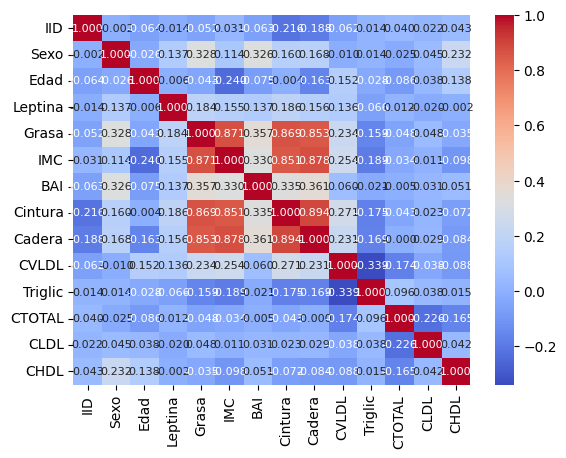

In [ ]:
import seaborn as sns  # Se importa la librería seaborn, que se utiliza para crear gráficos estadísticos.

# Se crea un mapa de calor de la matriz de correlación (corr_matrix) utilizando la función heatmap de seaborn.
# Se especifica que las etiquetas de los ejes x e y sean los nombres de las columnas de la matriz de correlación.
sns.heatmap(corr_matrix,
            xticklabels=corr_matrix.columns.values,  # Etiquetas del eje X
            yticklabels=corr_matrix.columns.values,  # Etiquetas del eje Y
            cmap='coolwarm',  # gama de colores a usar
            annot=True, # mostrar valor en cada casilla
            fmt=".3f",  # redondear valores a 3 decimales
            annot_kws={"size": 8}) # tamaño de valores mostrados en cada casilla

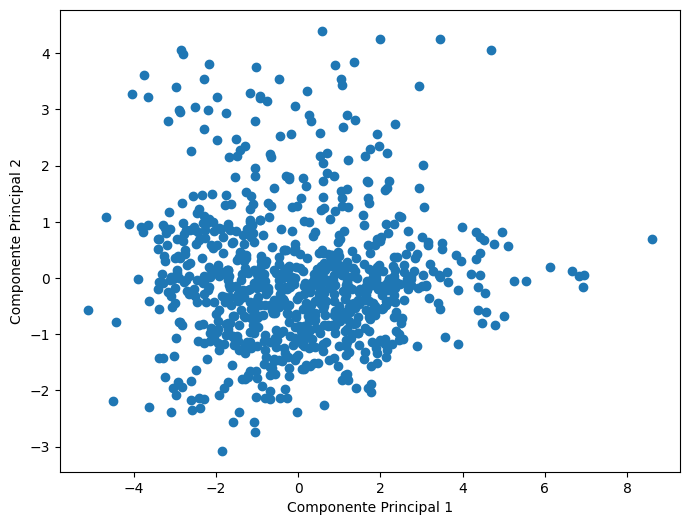

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['IID', 'Sexo']))

# Aplicar PCA
pca = PCA(n_components=2)  # Puedes ajustar el número de componentes
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
pca_data = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualizar los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(pca_data['PC1'], pca_data['PC2'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

**Riesgo Cardiovascular**


In [ ]:
# Definir pesos para cada variable (ajusta según la literatura o criterio clínico)
pesos = {
    'CTOTAL': 0.2,
    'CLDL': 0.3,
    'CHDL': -0.2,
    'Triglic': 0.2,
    'CVLDL': 0.1,
    'IMC': 0.15,
    'BAI': 0.1,
    'Cintura': 0.15,
    'Cadera': -0.1,
    'Grasa': 0.1,
    'Edad': 0.2,
    'Leptina': 0.05,
    'FTO_Aditivo': 0.05
}

# Calcular el índice de riesgo cardiovascular
data['Riesgo_Cardiovascular'] = (
    data['CTOTAL'] * pesos['CTOTAL'] +
    data['CLDL'] * pesos['CLDL'] +
    data['CHDL'] * pesos['CHDL'] +
    data['Triglic'] * pesos['Triglic'] +
    data['CVLDL'] * pesos['CVLDL'] +
    data['IMC'] * pesos['IMC'] +
    data['BAI'] * pesos['BAI'] +
    data['Cintura'] * pesos['Cintura'] +
    data['Cadera'] * pesos['Cadera'] +
    data['Grasa'] * pesos['Grasa'] +
    data['Edad'] * pesos['Edad'] +
    data['Leptina'] * pesos['Leptina'] +
    data['FTO_Aditivo'] * pesos['FTO_Aditivo']
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar el índice de riesgo entre 0 y 1
scaler = MinMaxScaler()
data['Riesgo_Cardiovascular'] = scaler.fit_transform(data[['Riesgo_Cardiovascular']])

In [ ]:
# Definir un umbral para clasificar el riesgo
umbral = 0.5
data['Riesgo_Cardiovascular_Binario'] = (data['Riesgo_Cardiovascular'] > umbral).astype(int)

# Verificar el balance de clases
print(data['Riesgo_Cardiovascular_Binario'].value_counts())

Riesgo_Cardiovascular_Binario
1    426
0    411
Name: count, dtype: int64


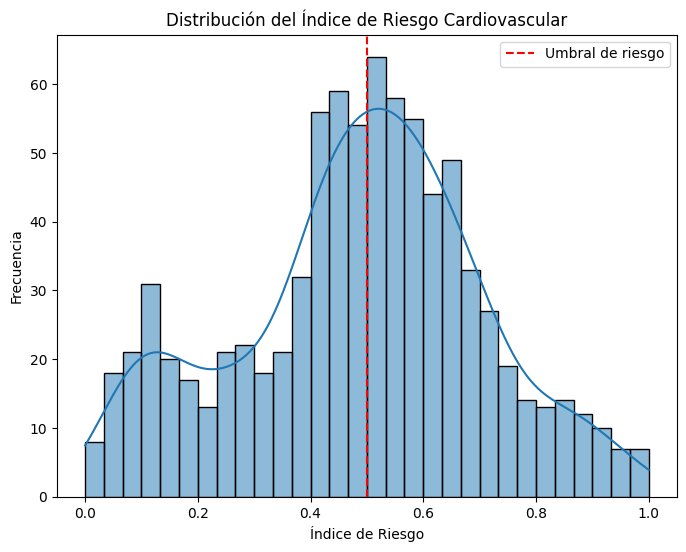

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma del índice de riesgo
plt.figure(figsize=(8, 6))
sns.histplot(data['Riesgo_Cardiovascular'], bins=30, kde=True)
plt.axvline(umbral, color='red', linestyle='--', label='Umbral de riesgo')
plt.title('Distribución del Índice de Riesgo Cardiovascular')
plt.xlabel('Índice de Riesgo')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# **Maquina de Soporte Vectorial**

Accuracy: 0.9801587301587301
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       112
           1       0.97      0.99      0.98       140

    accuracy                           0.98       252
   macro avg       0.98      0.98      0.98       252
weighted avg       0.98      0.98      0.98       252

Confusion Matrix:
 [[108   4]
 [  1 139]]


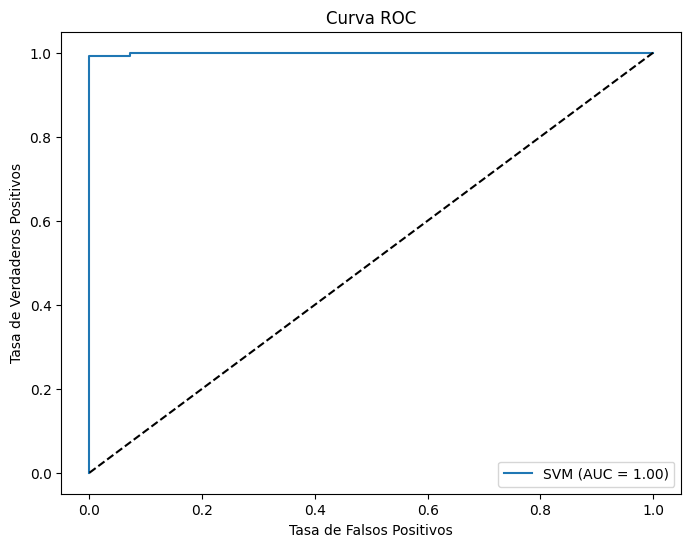

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Definir características (X) y variable objetivo (y)
X = data.drop(columns=['IID', 'Riesgo_Cardiovascular', 'Riesgo_Cardiovascular_Binario'])
y = data['Riesgo_Cardiovascular_Binario']

# Codificar variables categóricas
X = pd.get_dummies(X, columns=['Sexo'], drop_first=True)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

# Predecir y evaluar el modelo
y_pred = svm_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Curva ROC para SVM
y_pred_proba = svm_model.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

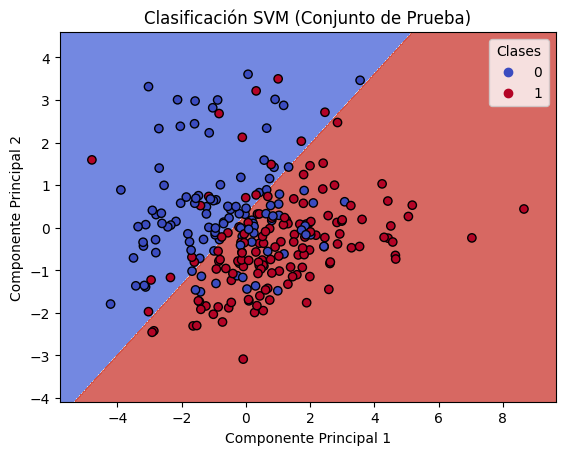

Accuracy: 0.7698412698412699
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.65      0.72       112
           1       0.76      0.86      0.81       140

    accuracy                           0.77       252
   macro avg       0.77      0.76      0.76       252
weighted avg       0.77      0.77      0.77       252

Confusion Matrix:
 [[ 73  39]
 [ 19 121]]


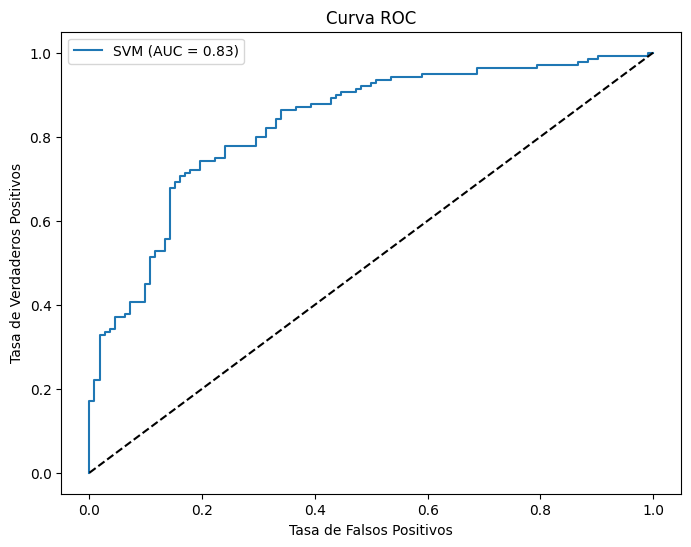

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Definir la variable objetivo (Riesgo_Cardiovascular_Binario)
X = data.drop(columns=['IID', 'Riesgo_Cardiovascular', 'Riesgo_Cardiovascular_Binario'])
y = data['Riesgo_Cardiovascular_Binario']

# Codificar variables categóricas
X = pd.get_dummies(X, columns=['Sexo'], drop_first=True)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Graficar la clasificación del SVM
def plot_svm_classification(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar las regiones de decisión
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Graficar los puntos de datos
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

    # Añadir leyenda y título
    plt.title(title)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(*scatter.legend_elements(), title="Clases")
    plt.show()

# Graficar la clasificación en el conjunto de prueba
plot_svm_classification(X_test, y_test, svm_model, "Clasificación SVM (Conjunto de Prueba)")

# Predecir y evaluar el modelo
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Curva ROC para SVM
y_pred_proba = svm_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

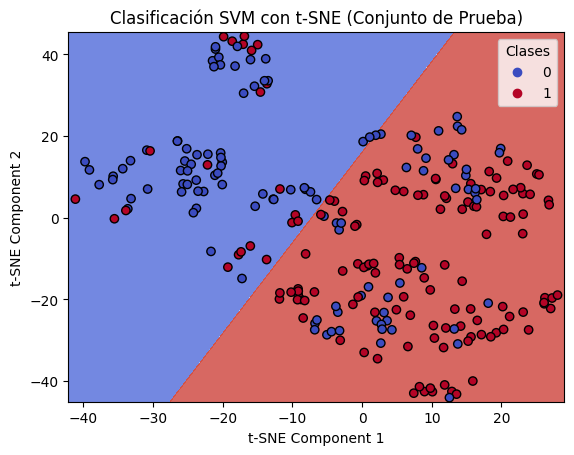

Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.55      0.63       112
           1       0.70      0.84      0.77       140

    accuracy                           0.71       252
   macro avg       0.72      0.70      0.70       252
weighted avg       0.72      0.71      0.71       252

Confusion Matrix:
 [[ 62  50]
 [ 22 118]]


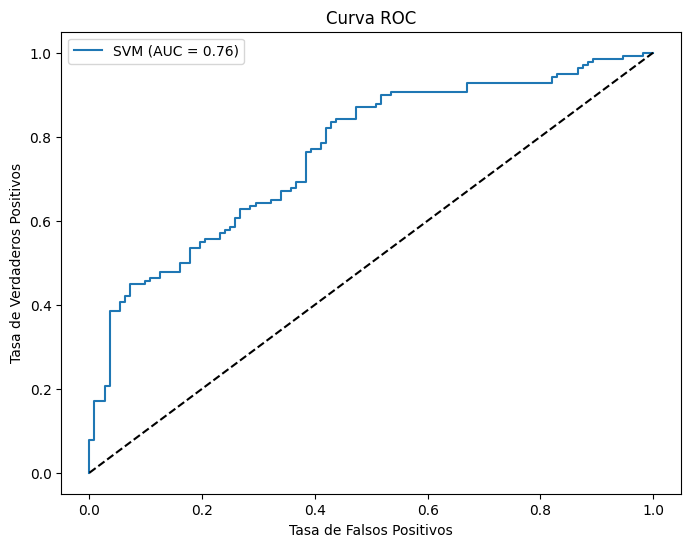

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Definir la variable objetivo (Riesgo_Cardiovascular_Binario)
X = data.drop(columns=['IID', 'Riesgo_Cardiovascular', 'Riesgo_Cardiovascular_Binario'])
y = data['Riesgo_Cardiovascular_Binario']

# Codificar variables categóricas
X = pd.get_dummies(X, columns=['Sexo'], drop_first=True)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir la dimensionalidad a 2 componentes usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.3, random_state=42)

# Entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Graficar la clasificación del SVM
def plot_svm_classification(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar las regiones de decisión
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Graficar los puntos de datos
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

    # Añadir leyenda y título
    plt.title(title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(*scatter.legend_elements(), title="Clases")
    plt.show()

# Graficar la clasificación en el conjunto de prueba
plot_svm_classification(X_test, y_test, svm_model, "Clasificación SVM con t-SNE (Conjunto de Prueba)")


# Predecir y evaluar el modelo
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Curva ROC para SVM
y_pred_proba = svm_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# **Red Neuronal**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.4777 - loss: 0.7551 - val_accuracy: 0.4957 - val_loss: 0.6615
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6487 - loss: 0.5973 - val_accuracy: 0.7863 - val_loss: 0.5447
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8562 - loss: 0.4927 - val_accuracy: 0.8974 - val_loss: 0.4524
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8799 - loss: 0.4228 - val_accuracy: 0.9231 - val_loss: 0.3737
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9220 - loss: 0.3379 - val_accuracy: 0.9402 - val_loss: 0.3088
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9141 - loss: 0.2801 - val_accuracy: 0.9402 - val_loss: 0.2575
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9455 - loss: 0.2389 - val_accuracy: 0.9316 - val_loss: 0.2206
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9344 - loss: 0.2021 - val_accuracy: 0.9402 - v

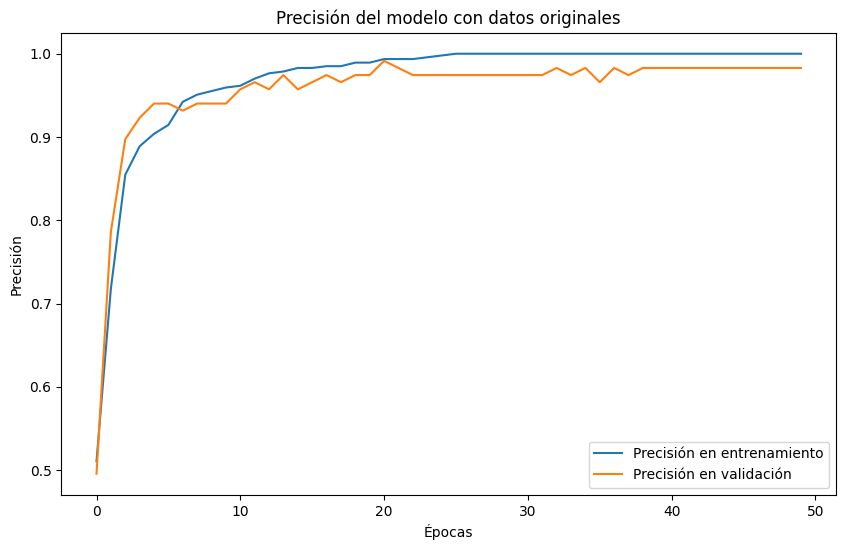

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy en el conjunto de prueba: 0.9841269841269841
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       112
           1       1.00      0.97      0.99       140

    accuracy                           0.98       252
   macro avg       0.98      0.99      0.98       252
weighted avg       0.98      0.98      0.98       252

Confusion Matrix:
 [[112   0]
 [  4 136]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir la variable objetivo (Riesgo_Cardiovascular_Binario)
X = data.drop(columns=['IID', 'Riesgo_Cardiovascular', 'Riesgo_Cardiovascular_Binario'])
y = data['Riesgo_Cardiovascular_Binario']

# Codificar variables categóricas
X = pd.get_dummies(X, columns=['Sexo'], drop_first=True)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de red neuronal
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_nn_model(X_train.shape[1])
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Graficar la precisión durante el entrenamiento y la validación
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión del modelo con datos originales')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Evaluar el modelo en el conjunto de prueba
y_pred = (nn_model.predict(X_test) > 0.5).astype(int)
print("Accuracy en el conjunto de prueba:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.4877 - loss: 0.7151 - val_accuracy: 0.5128 - val_loss: 0.6869
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4634 - loss: 0.6954 - val_accuracy: 0.5556 - val_loss: 0.6733
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4890 - loss: 0.6856 - val_accuracy: 0.5128 - val_loss: 0.6843
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5399 - loss: 0.6799 - val_accuracy: 0.5897 - val_loss: 0.6754
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5404 - loss: 0.6768 - val_accuracy: 0.6154 - val_loss: 0.6697
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5642 - loss: 0.6698 - val_accuracy: 0.5812 - val_loss: 0.6692
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5525 - loss: 0.6732 - val_accuracy: 0.5726 - val_loss: 0.6698
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5287 - loss: 0.6776 - val_accuracy: 0.6154 - val_loss: 0.6

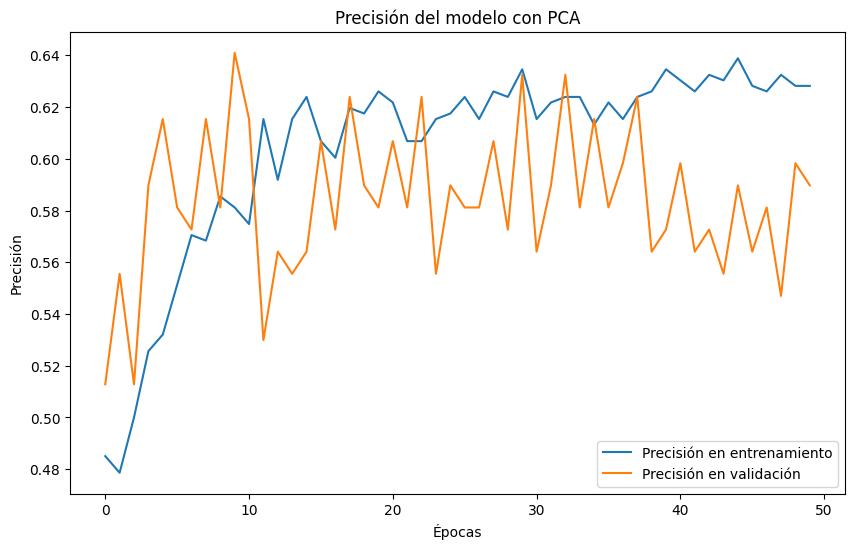

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy en el conjunto de prueba (PCA): 0.5873015873015873
Classification Report (PCA):
               precision    recall  f1-score   support

           0       0.58      0.63      0.60       125
           1       0.60      0.54      0.57       127

    accuracy                           0.59       252
   macro avg       0.59      0.59      0.59       252
weighted avg       0.59      0.59      0.59       252

Confusion Matrix (PCA):
 [[79 46]
 [58 69]]
10508/10508 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step


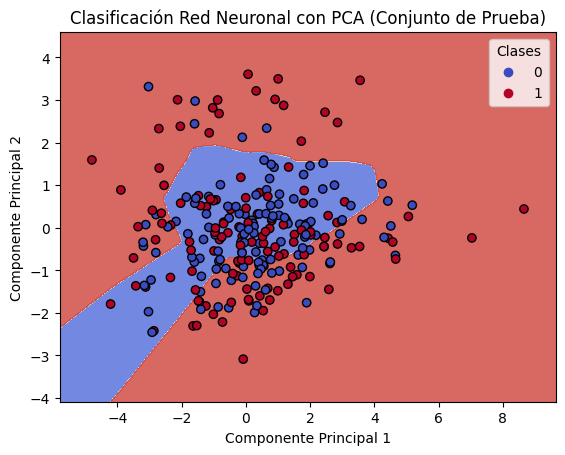

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Definir la variable objetivo (Riesgo_Cardiovascular_Binario)
X = data.drop(columns=['IID', 'Riesgo_Cardiovascular', 'Riesgo_Cardiovascular_Binario'])
y = data['Riesgo_Cardiovascular_Binario']

# Codificar variables categóricas
X = pd.get_dummies(X, columns=['Sexo'], drop_first=True)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir la dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Dividir los datos reducidos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de red neuronal
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model_pca = create_nn_model(X_train.shape[1])
history_pca = nn_model_pca.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Graficar la precisión durante el entrenamiento y la validación
plt.figure(figsize=(10, 6))
plt.plot(history_pca.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history_pca.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión del modelo con PCA')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Evaluar el modelo en el conjunto de prueba
y_pred_pca = (nn_model_pca.predict(X_test) > 0.5).astype(int)
print("Accuracy en el conjunto de prueba (PCA):", accuracy_score(y_test, y_pred_pca))
print("Classification Report (PCA):\n", classification_report(y_test, y_pred_pca))
print("Confusion Matrix (PCA):\n", confusion_matrix(y_test, y_pred_pca))


def plot_nn_classification(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int).reshape(xx.shape)

    # Graficar las regiones de decisión
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Graficar los puntos de datos
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

    # Añadir leyenda y título
    plt.title(title)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(*scatter.legend_elements(), title="Clases")
    plt.show()

# Graficar la clasificación con PCA
plot_nn_classification(X_test, y_test, nn_model_pca, "Clasificación Red Neuronal con PCA (Conjunto de Prueba)")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6609 - loss: 0.7028 - val_accuracy: 0.6239 - val_loss: 0.5787
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6866 - loss: 0.5906 - val_accuracy: 0.6068 - val_loss: 0.5788
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6526 - loss: 0.6188 - val_accuracy: 0.6667 - val_loss: 0.5922
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6992 - loss: 0.5705 - val_accuracy: 0.7009 - val_loss: 0.5935
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6374 - loss: 0.6083 - val_accuracy: 0.6667 - val_loss: 0.5584
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7320 - loss: 0.5579 - val_accuracy: 0.6154 - val_loss: 0.6487
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6816 - loss: 0.5677 - val_accuracy: 0.6838 - val_loss: 0.5676
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7129 - loss: 0.5445 - val_accuracy: 0.7265 - val_loss: 0.5793
E

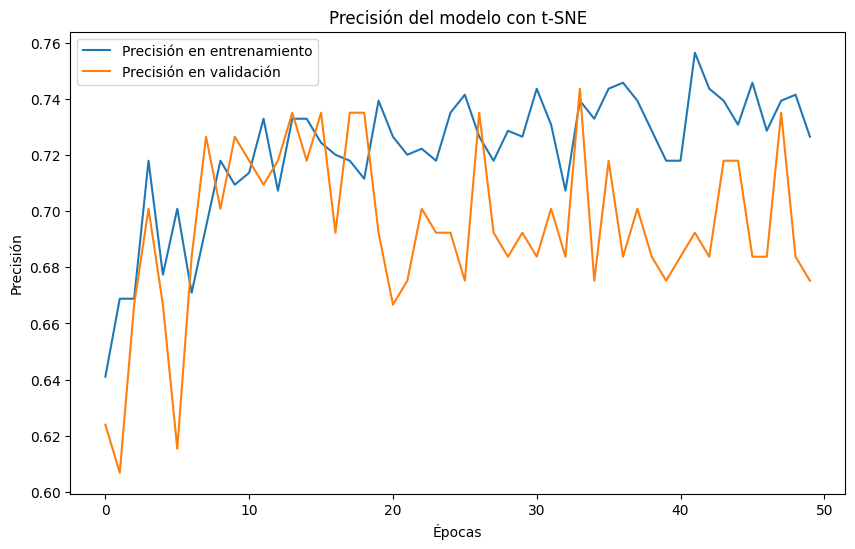

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Accuracy en el conjunto de prueba (t-SNE): 0.6428571428571429
Classification Report (t-SNE):
               precision    recall  f1-score   support

           0       0.61      0.78      0.69       125
           1       0.70      0.50      0.59       127

    accuracy                           0.64       252
   macro avg       0.66      0.64      0.64       252
weighted avg       0.66      0.64      0.64       252

Confusion Matrix (t-SNE):
 [[98 27]
 [63 64]]
503771/503771 ━━━━━━━━━━━━━━━━━━━━ 717s 1ms/step


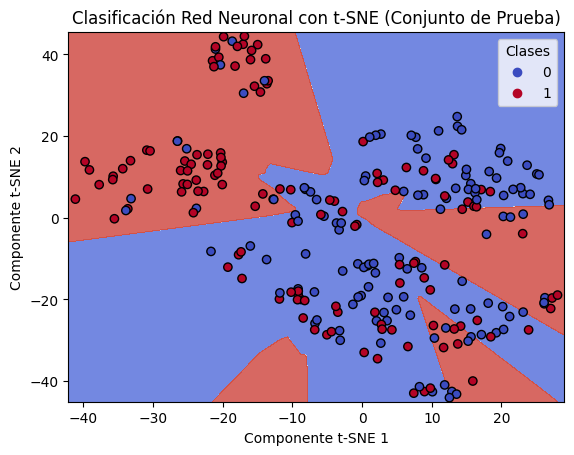

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir la variable objetivo (Riesgo_Cardiovascular_Binario)
X = data.drop(columns=['IID', 'Riesgo_Cardiovascular', 'Riesgo_Cardiovascular_Binario'])
y = data['Riesgo_Cardiovascular_Binario']

# Codificar variables categóricas
X = pd.get_dummies(X, columns=['Sexo'], drop_first=True)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir la dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Dividir los datos reducidos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de red neuronal
def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model_tsne = create_nn_model(X_train.shape[1])
history_tsne = nn_model_tsne.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Graficar la precisión durante el entrenamiento y la validación
plt.figure(figsize=(10, 6))
plt.plot(history_tsne.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history_tsne.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión del modelo con t-SNE')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Evaluar el modelo en el conjunto de prueba
y_pred_tsne = (nn_model_tsne.predict(X_test) > 0.5).astype(int)
print("Accuracy en el conjunto de prueba (t-SNE):", accuracy_score(y_test, y_pred_tsne))
print("Classification Report (t-SNE):\n", classification_report(y_test, y_pred_tsne))
print("Confusion Matrix (t-SNE):\n", confusion_matrix(y_test, y_pred_tsne))


def plot_nn_classification(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int).reshape(xx.shape)

    # Graficar las regiones de decisión
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Graficar los puntos de datos
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)


    plt.title(title)
    plt.xlabel('Componente t-SNE 1')
    plt.ylabel('Componente t-SNE 2')
    plt.legend(*scatter.legend_elements(), title="Clases")
    plt.show()

# Graficar la clasificación con t-SNE
plot_nn_classification(X_test, y_test, nn_model_tsne, "Clasificación Red Neuronal con t-SNE (Conjunto de Prueba)")